In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# statsmodels.tsa.api module that are related to time series analysis and forecasting
from statsmodels.tsa.api import  ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [63]:
df=pd.read_csv('gold_monthly_csv.csv')
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [64]:
df

,Date,Price
0,1950-01,34.730
1,1950-02,34.730
2,1950-03,34.730
3,1950-04,34.730
4,1950-05,34.730
...,...,...
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032


In [65]:
df.shape
#847 Rows & 2columns

(847, 2)

# Explorartory Data Analysis

In [66]:
#Understanding the Dataset 
print(f"Data range of gold price available from - {df.loc[:,'Date'][0]} to  {df.loc[:,'Date'][len(df)-1]} ")

Data range of gold price available from - 1950-01 to  2020-07 


In [67]:
date=pd.date_range(start='1/1/1950', end='8/1/2020', freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [68]:
df['Month']=date
df.drop('Date',axis=1,inplace=True)
df=df.set_index('Month')
df.head()

,Price
Month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


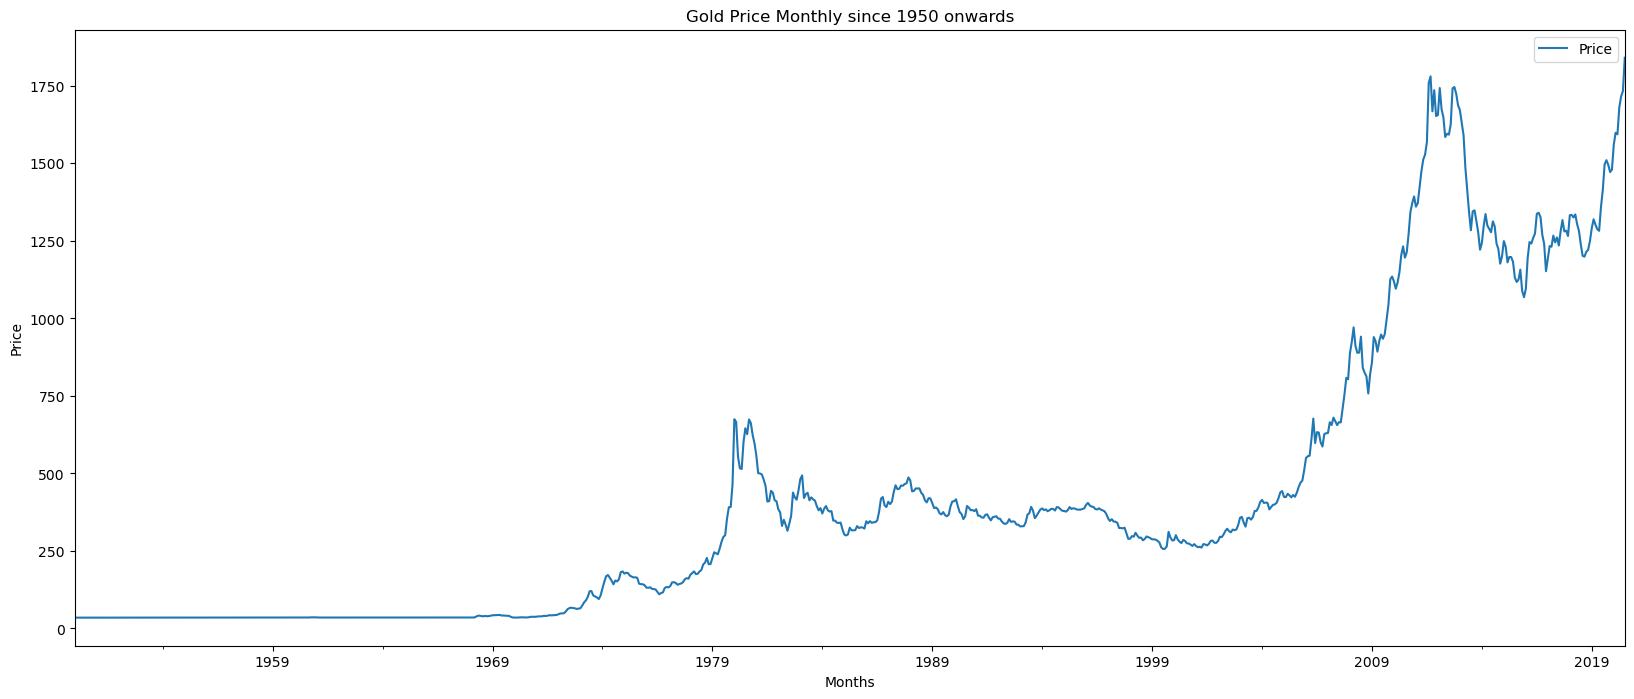

In [69]:
df.plot(figsize=(20,8))
plt.title('Gold Price Monthly since 1950 onwards')
plt.xlabel('Months')
plt.ylabel('Price')
plt.show()


In [70]:
df.columns

Index(['Price'], dtype='object')

In [71]:
df['Price']

Month
1950-01-31      34.730
1950-02-28      34.730
1950-03-31      34.730
1950-04-30      34.730
1950-05-31      34.730
                ...   
2020-03-31    1593.764
2020-04-30    1680.030
2020-05-31    1715.697
2020-06-30    1734.032
2020-07-31    1840.807
Name: Price, Length: 847, dtype: float64

In [72]:
overview=df.describe()
overview

,Price
count,847.000000
mean,416.556906
std,453.665313
min,34.490000
25%,35.190000
50%,319.622000
75%,447.029000
max,1840.807000


In [73]:
#The Average gold price in last 70years is $416
#25% of time the gold price is $35.190
#Higehst old price is touched to $1840

# Visual Analysis

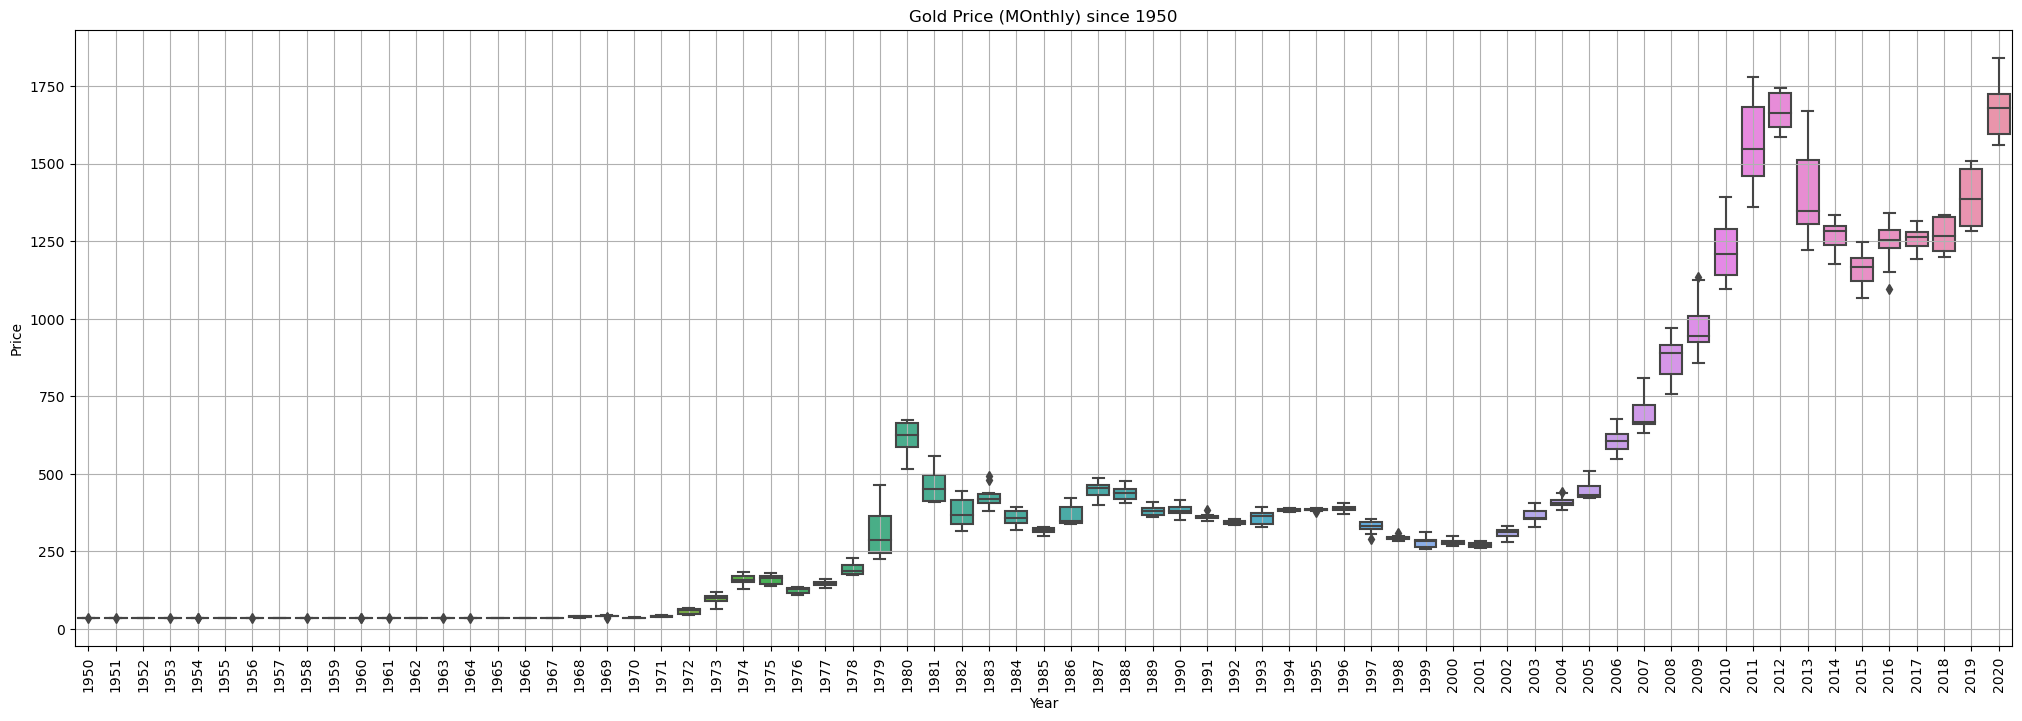

In [74]:
_,ax=plt.subplots(figsize=(25,8))
sns.boxplot(x=df.index.year, y=df.values[:,0],ax=ax)
plt.title('Gold Price (MOnthly) since 1950')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid()

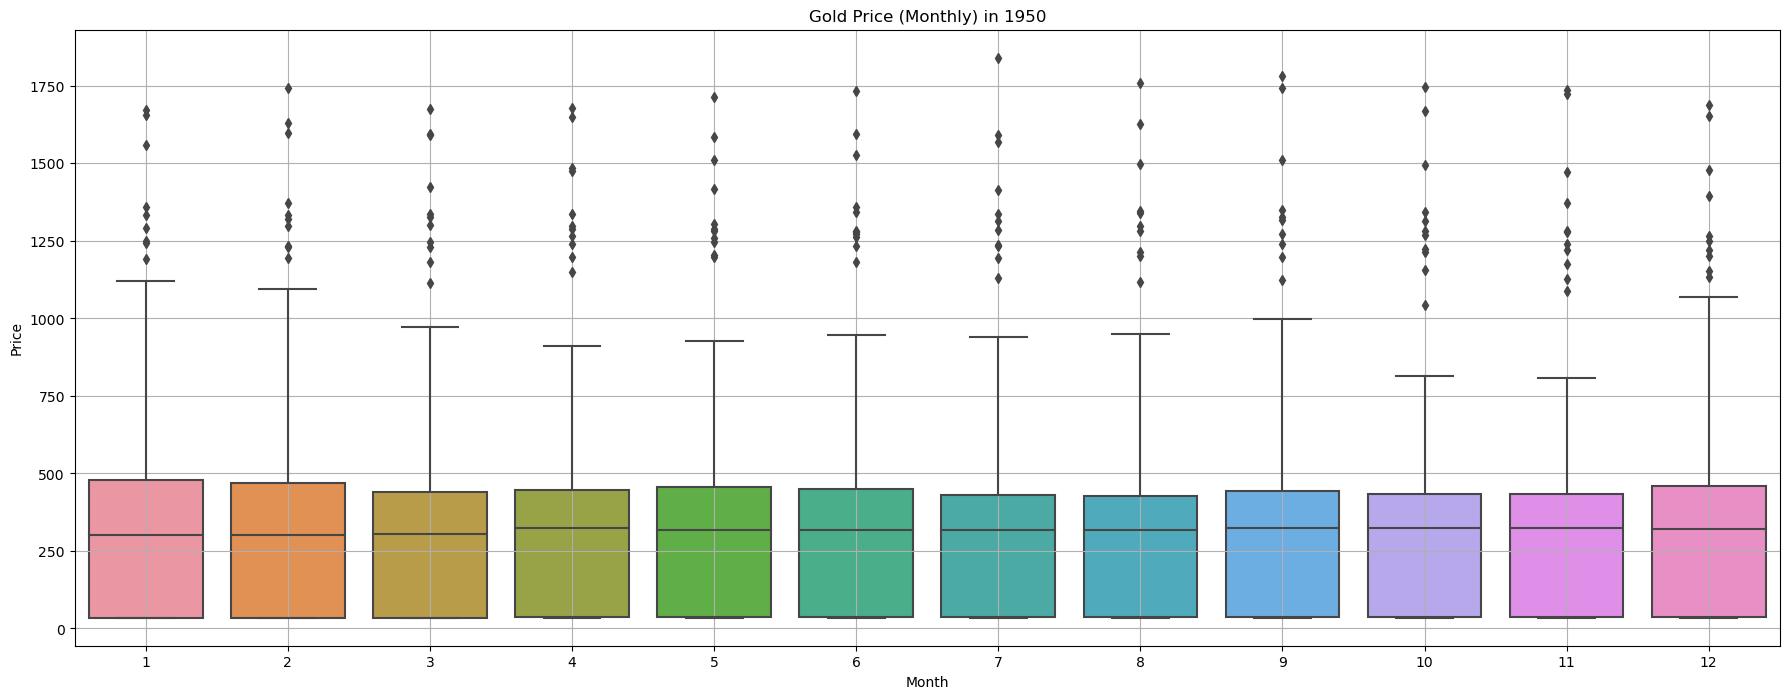

In [75]:
_,ax=plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.month, y=df['Price'],ax=ax)
plt.title("Gold Price (Monthly) in 1950")
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid()

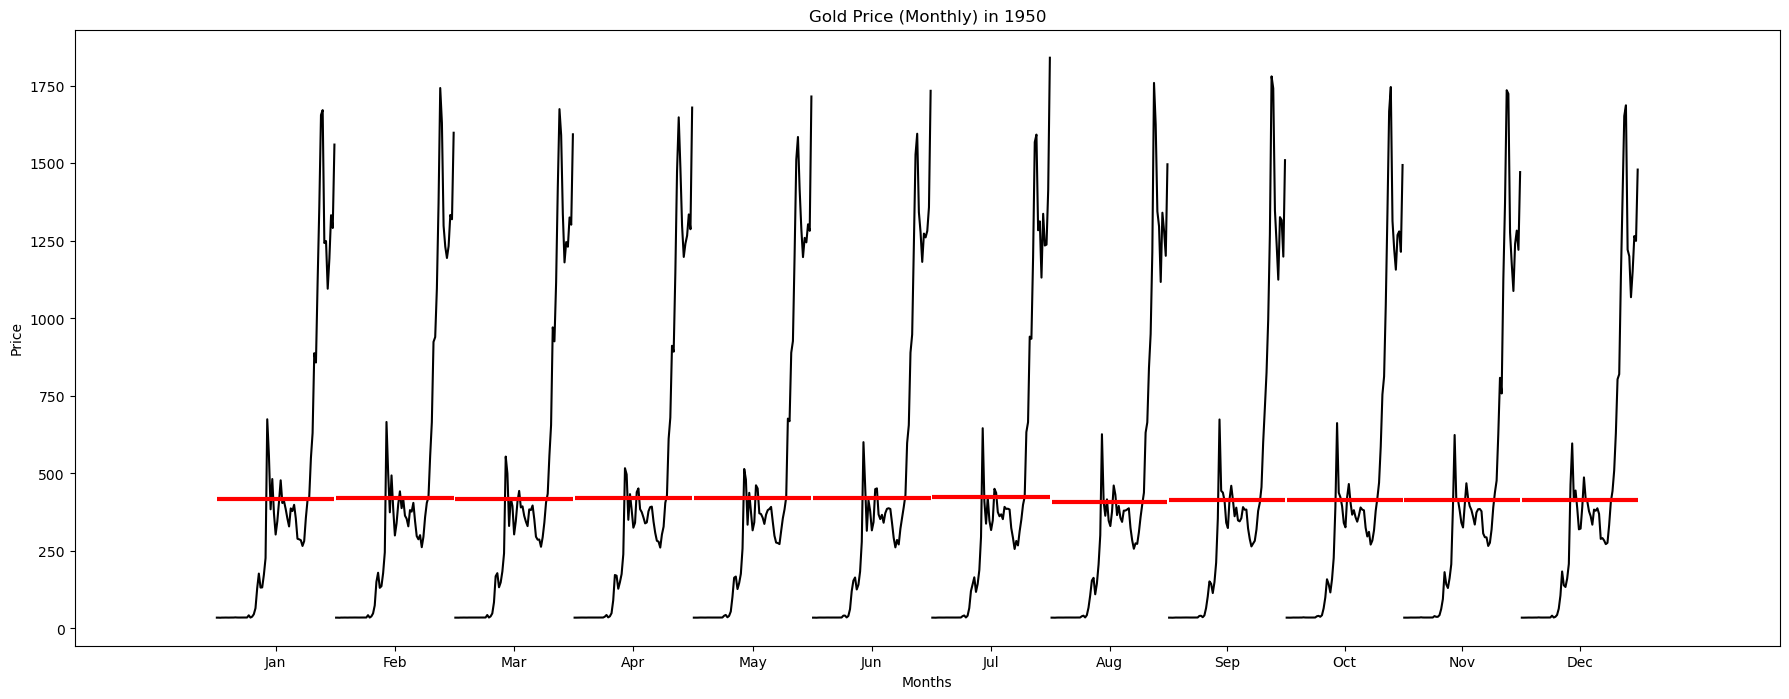

In [76]:
from statsmodels.graphics.tsaplots import month_plot

fig,ax=plt.subplots(figsize=(22,8))

month_plot(df,ylabel='GOLD Price', ax=ax)
plt.title('Gold Price (Monthly) in 1950')
plt.xlabel('Months')
plt.ylabel('Price')
plt.show()

In [77]:
#In resample the 'M' stands for Month, 'A' stands for Annual, Q stands for Quartile

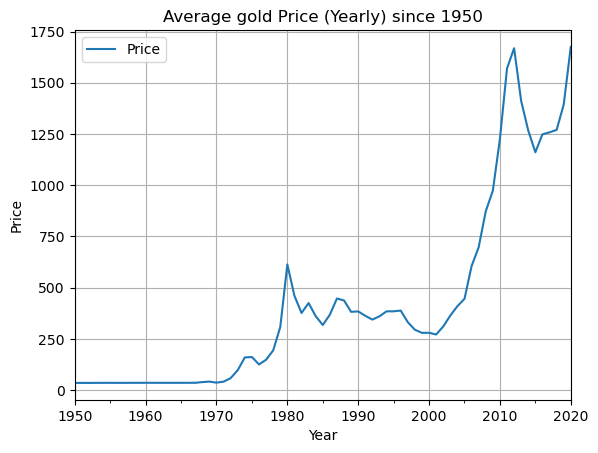

In [78]:
df_yearly_sum=df.resample('A').mean()
df_yearly_sum.plot()
plt.title('Average gold Price (Yearly) since 1950')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()

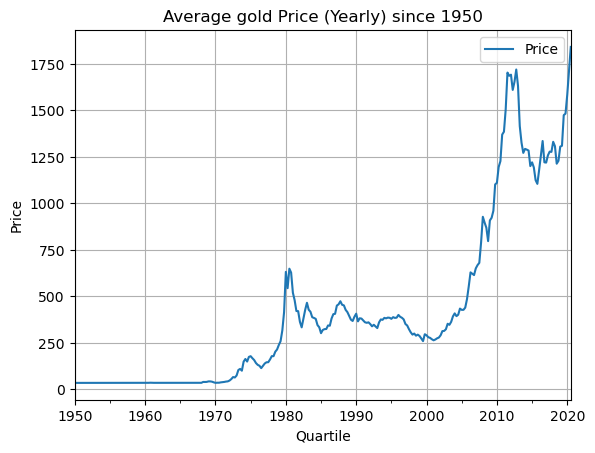

In [79]:
df_yearly_sum=df.resample('Q').mean()
df_yearly_sum.plot()
plt.title('Average gold Price (Yearly) since 1950')
plt.xlabel('Quartile')
plt.ylabel('Price')
plt.grid()

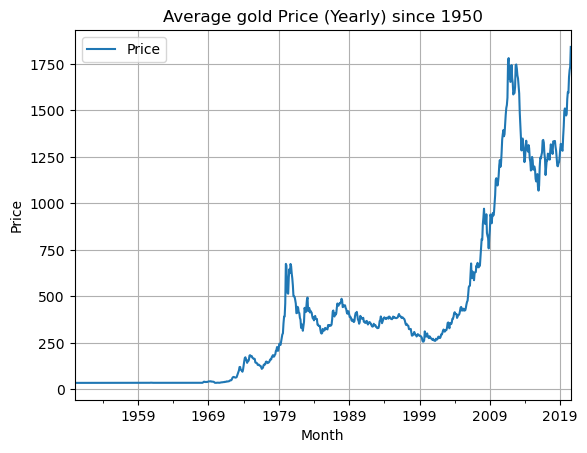

In [80]:
df_yearly_sum=df.resample('M').mean()
df_yearly_sum.plot()
plt.title('Average gold Price (Yearly) since 1950')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid()

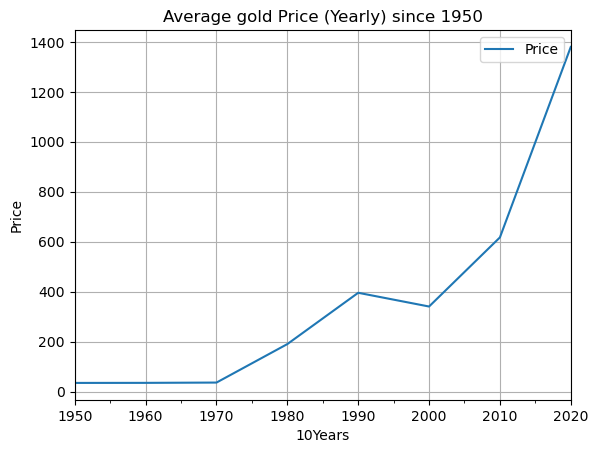

In [81]:
df_yearly_sum=df.resample('10Y').mean()
df_yearly_sum.plot()
plt.title('Average gold Price (Yearly) since 1950')
plt.xlabel('10Years')
plt.ylabel('Price')
plt.grid()

# Analysis in Coefficient of variation

In [82]:
df_1 = df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}),left_index=True,right_index=True)
df_1['CoV_pct'] = ((df_1['Std']/df_1['Mean'])*100).round(2)
df_1['CoV_pct']
df_1.head()

,Mean,Std,CoV_pct
Month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


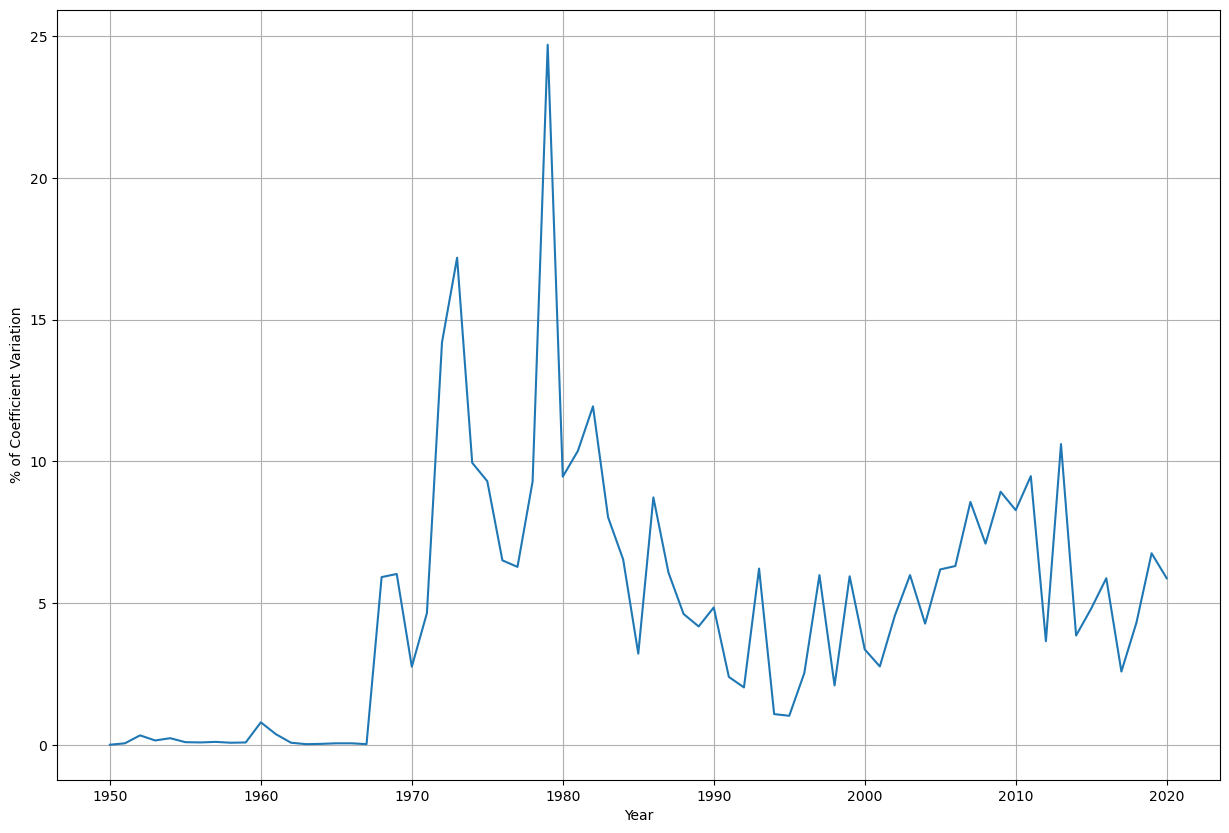

In [83]:
# Average gold price per year trend since 1950
fig,ax=plt.subplots(figsize=(15,10))
df_1['CoV_pct'].plot()
plt.xlabel('Year')
plt.ylabel('% of Coefficient Variation')
plt.grid()

# Inference

# Time Series - Forecasting models

# Train - Test split to build Time series forecasting models

In [84]:
train = df[df.index.year<=2015]
test  = df[df.index.year> 2015]

In [85]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


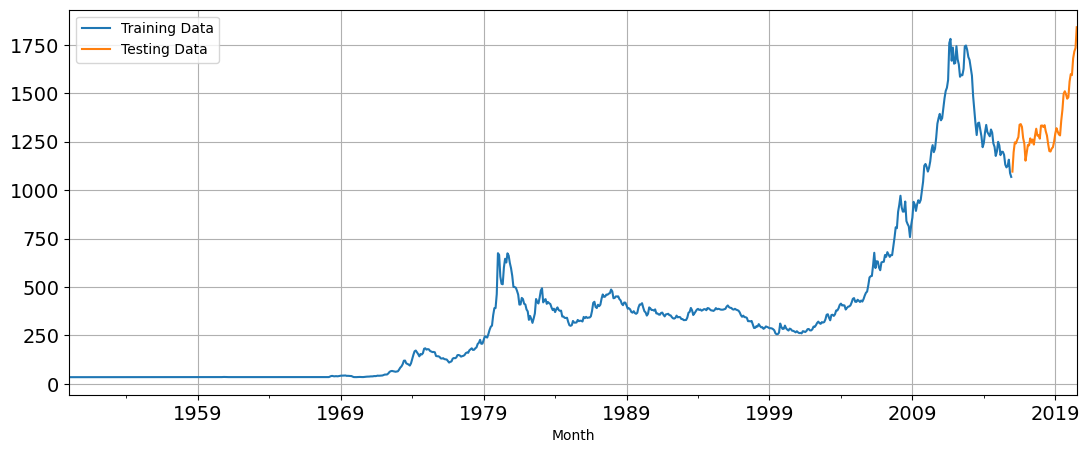

In [86]:
train['Price'].plot(figsize=(13,5), fontsize=14)
test['Price'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Testing Data'])

# Model 1:- Linear Regression

In [87]:
train_time=[i+1 for i in range(len(train))]
test_time=[i+len(train)+1 for i in range(len(test))]
len(train_time),len(test_time)

(792, 55)

In [88]:
LR_train=train.copy()
LR_test = test.copy()

In [89]:
LR_train['time']=train_time
LR_test['time']=test_time

In [90]:
LR_train.head()

,Price,time
Month,,
1950-01-31,34.73,1
1950-02-28,34.73,2
1950-03-31,34.73,3
1950-04-30,34.73,4
1950-05-31,34.73,5


In [91]:
lr=LinearRegression()
lr.fit(LR_train[['time']],LR_train['Price'].values)

LinearRegression()

In [126]:
from sklearn.metrics import mean_absolute_error
# Assuming LR_test['Price'] is the actual values and LR_test['forecast'] is the predicted values
mae = mean_absolute_error(LR_test['Price'], LR_test['forecast'])
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 408.32524777760074


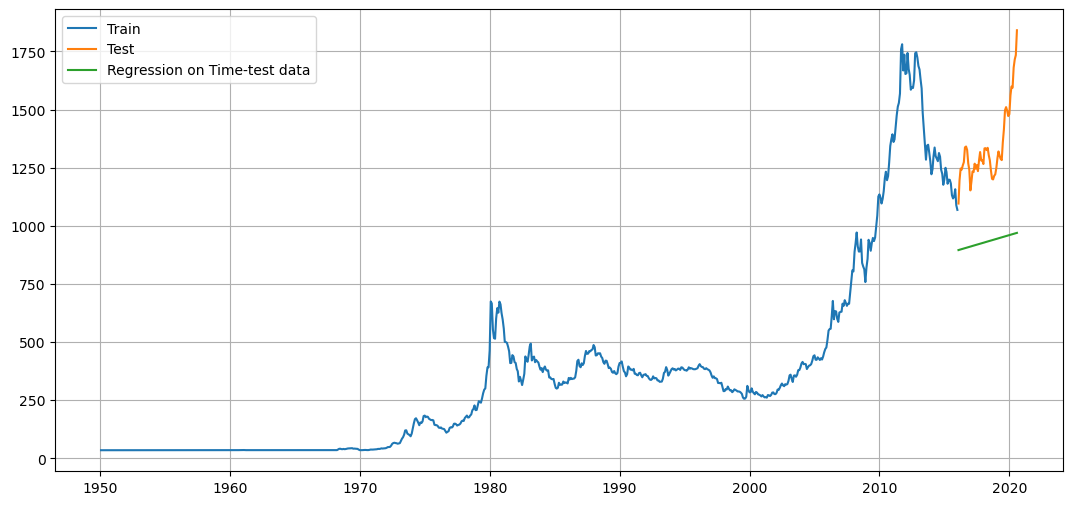

In [95]:
test_prediction_model1=lr.predict(LR_test[['time']])
LR_test['forecast']=test_prediction_model1

plt.figure(figsize=(13,6))
plt.plot(train['Price'],label='Train')
plt.plot(test['Price'],label='Test')
plt.plot(LR_test['forecast'],label='Regression on Time-test data')
plt.legend(loc='best')
plt.grid()

In [96]:
def mape(actual,pred):
    return round((np.mean(abs(actual-pred)/actual))*100,2)

In [97]:
#Get MAPE of the Model

mape_model1_test=mape(test['Price'].values,test_prediction_model1)
print("For RegressionOnTime forecast on the Test Data,  MAPE is %3.3f" %(mape_model1_test),"%")
print("For RegressionOnTime forecast on the Test Data,  MAPE is %3.3f")

For RegressionOnTime forecast on the Test Data,  MAPE is 29.760 %
For RegressionOnTime forecast on the Test Data,  MAPE is %3.3f


In [98]:
results = pd.DataFrame({'Test MAPE (%)': [mape_model1_test]},index=['RegressionOnTime'])
results

,Test MAPE (%)
RegressionOnTime,29.76


# Model 2:- Naive prediction

In [99]:
Naive_train = train.copy()
Naive_test  = test.copy()

In [100]:
Naive_test['Naive']=np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['Naive'].head()

Month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: Naive, dtype: float64

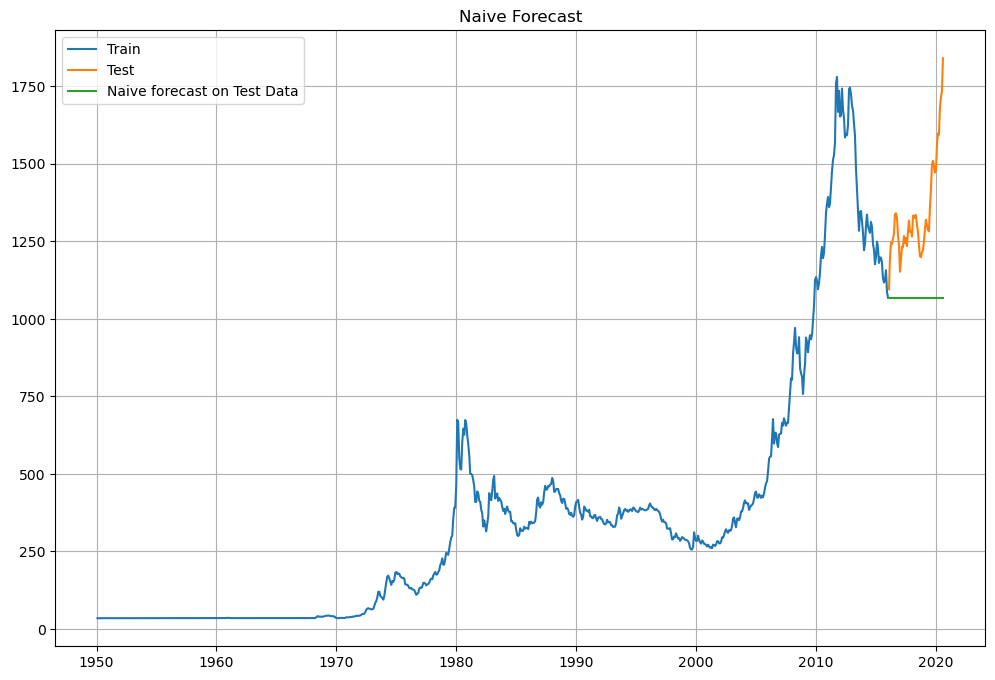

In [101]:
plt.figure(figsize=(12,8))
plt.plot(Naive_train['Price'], label='Train')
plt.plot(test['Price'],label='Test')
plt.plot(Naive_test['Naive'],label='Naive forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid()

In [104]:
mape_model2_test= mape(test['Price'].values,Naive_test['Naive'].values)
mape_model2_test

19.38

In [105]:
print(f"For Naive forecast on the Test Data,  MAPE is {mape_model2_test} %")

For Naive forecast on the Test Data,  MAPE is 19.38 %


In [106]:
resultsDf_1=pd.DataFrame({'Test MAPE (%)': [mape_model2_test]},index=['NaiveModel'])

results= pd.concat([results, resultsDf_1])
results

,Test MAPE (%)
RegressionOnTime,29.76
NaiveModel,19.38


# Model 3:- Simple Average

In [107]:
Simple_Average=train.copy()
Simple_Average=test.copy()

Simple_Average['mean_forecast']=train['Price'].mean()
Simple_Average['mean_forecast'].head()

Month
2016-01-31    352.371841
2016-02-29    352.371841
2016-03-31    352.371841
2016-04-30    352.371841
2016-05-31    352.371841
Name: mean_forecast, dtype: float64

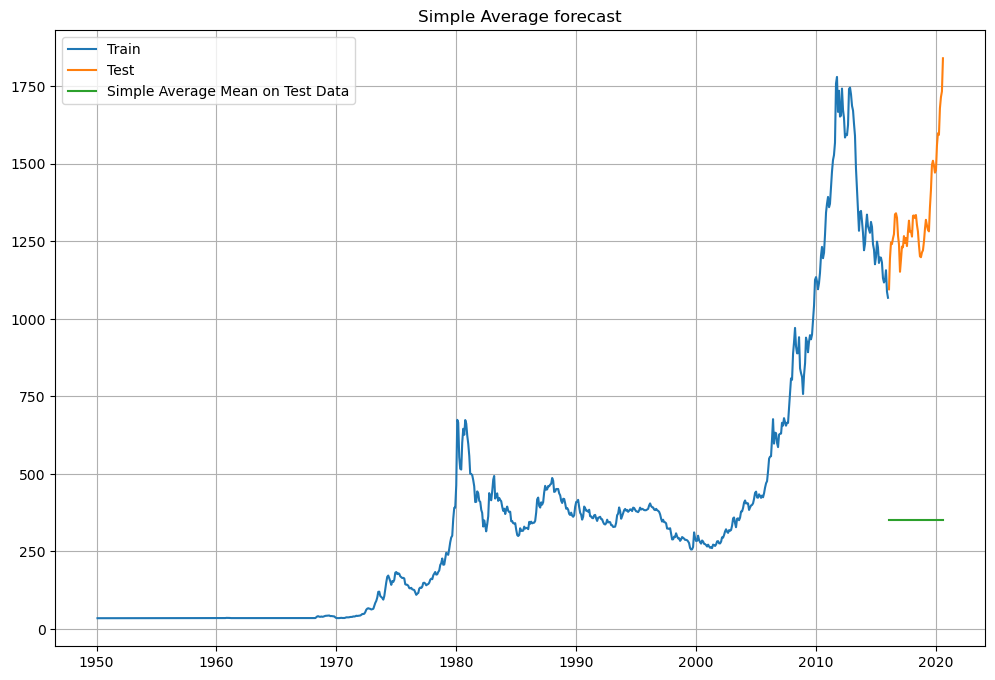

In [108]:
plt.figure(figsize=(12,8))
plt.plot(train['Price'],label='Train')
plt.plot(test['Price'],label='Test')
plt.plot(Simple_Average['mean_forecast'], label='Simple Average Mean on Test Data')
plt.title('Simple Average forecast')
plt.grid()
plt.legend(loc='best')

In [109]:
mape_model3_test=mape(test['Price'].values,Simple_Average['mean_forecast'].values)
mape_model3_test

73.41

In [110]:
print(f"For Simple Average Mean forecast on the Test Data,  MAPE is {mape_model3_test} %")

For Simple Average Mean forecast on the Test Data,  MAPE is 73.41 %


In [111]:
resultsDf_3 = pd.DataFrame({'Test MAPE (%)': [mape_model3_test]},index=['SimpleAverageModel'])

results = pd.concat([results, resultsDf_3])
results

,Test MAPE (%)
RegressionOnTime,29.76
NaiveModel,19.38
SimpleAverageModel,73.41


# Moving Average

In [112]:
Mvg_Avg = df.copy()
Mvg_Avg['Trailing_2'] = Mvg_Avg['Price'].rolling(2).mean()
Mvg_Avg['Trailing_3'] = Mvg_Avg['Price'].rolling(3).mean()
Mvg_Avg['Trailing_5'] = Mvg_Avg['Price'].rolling(5).mean()
Mvg_Avg['Trailing_7'] = Mvg_Avg['Price'].rolling(7).mean()
Mvg_Avg.head()

,Price,Trailing_2,Trailing_3,Trailing_5,Trailing_7
Month,,,,,
1950-01-31,34.73,NaN,NaN,NaN,NaN
1950-02-28,34.73,34.73,NaN,NaN,NaN
1950-03-31,34.73,34.73,34.73,NaN,NaN
1950-04-30,34.73,34.73,34.73,NaN,NaN
1950-05-31,34.73,34.73,34.73,34.73,NaN


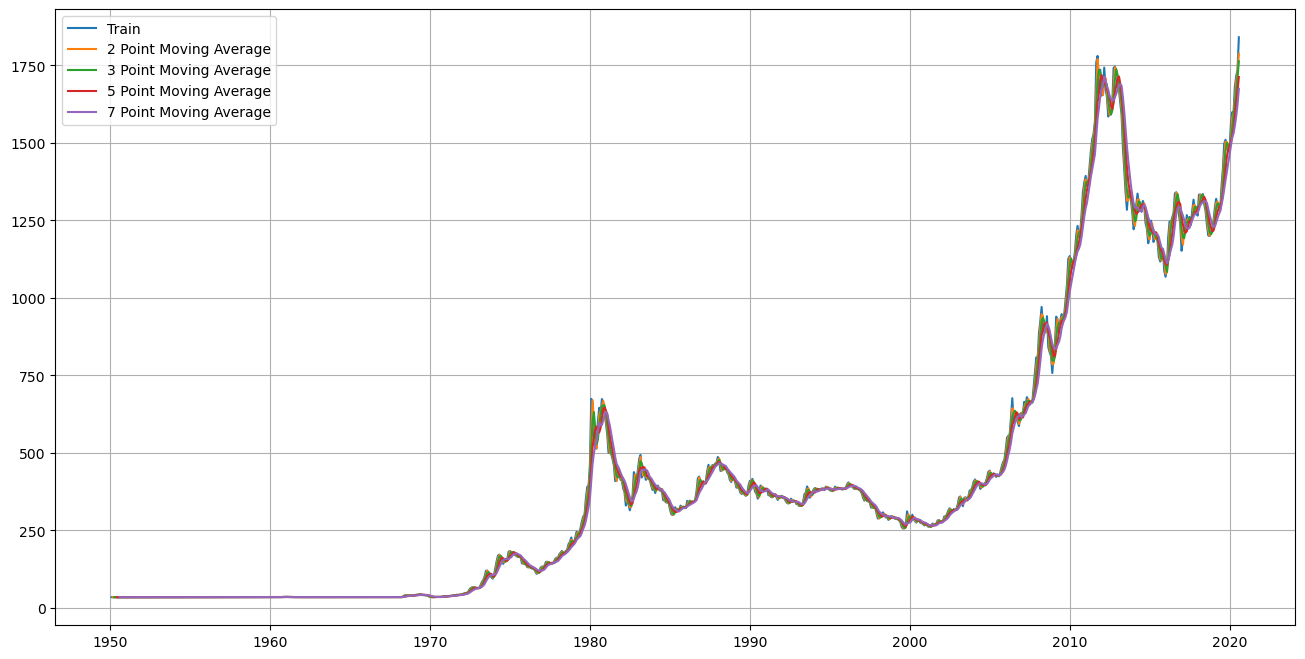

In [113]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(Mvg_Avg['Price'], label='Train')
plt.plot(Mvg_Avg['Trailing_2'],label='2 Point Moving Average')
plt.plot(Mvg_Avg['Trailing_3'],label='3 Point Moving Average')
plt.plot(Mvg_Avg['Trailing_5'],label = '5 Point Moving Average')
plt.plot(Mvg_Avg['Trailing_7'],label = '7 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [114]:
trailing_Mvg_Avg_train= Mvg_Avg[Mvg_Avg.index.year<=2015]
trailing_Mvg_Avg_test= Mvg_Avg[Mvg_Avg.index.year>2015]

In [115]:
#As we are getting Closed Predicted Values by Trailing the consecutive the Data Points
trailing_Mvg_Avg_test.head()

,Price,Trailing_2,Trailing_3,Trailing_5,Trailing_7
Month,,,,,
2016-01-31,1095.655,1081.9860,1084.120000,1106.8776,1111.927571
2016-02-29,1194.893,1145.2740,1119.621667,1120.8752,1120.972286
2016-03-31,1246.312,1220.6025,1178.953333,1138.7130,1139.370429
2016-04-30,1241.452,1243.8820,1227.552333,1169.3258,1156.020000
2016-05-31,1259.755,1250.6035,1249.173000,1207.6134,1170.681714


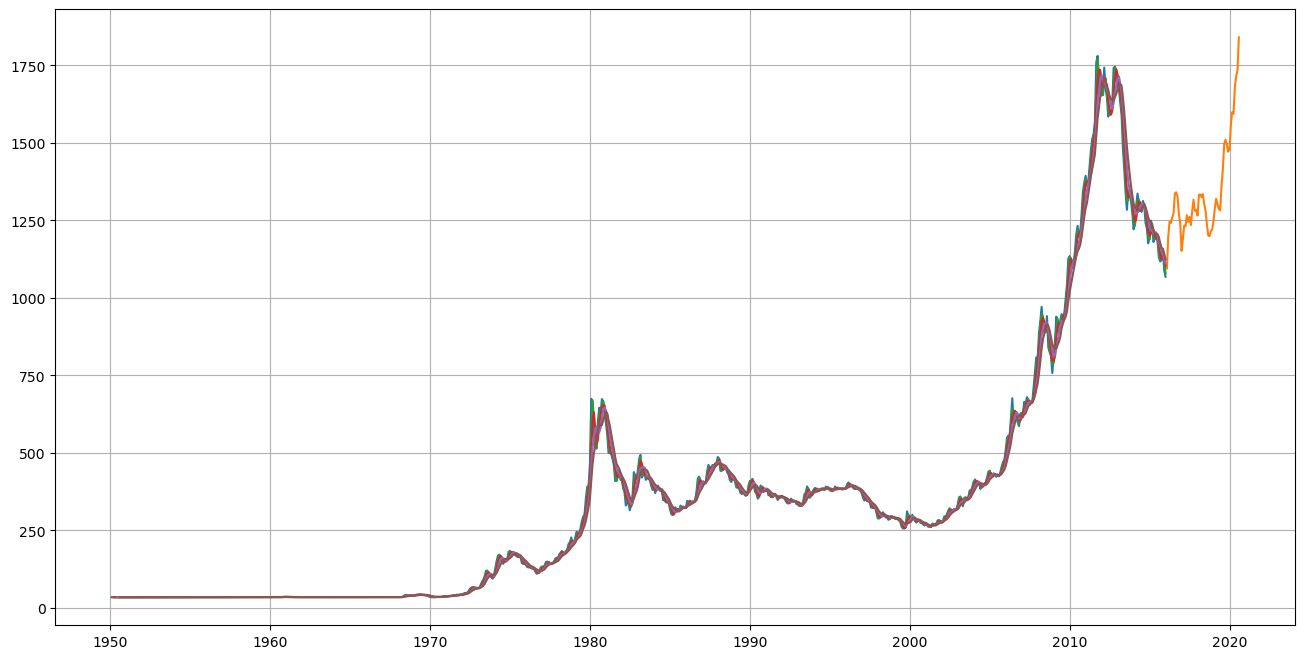

In [116]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_Mvg_Avg_train['Price'], label='Train')
plt.plot(trailing_Mvg_Avg_test['Price'], label='Test')

plt.plot(trailing_Mvg_Avg_train['Trailing_2'],label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_Mvg_Avg_train['Trailing_3'],label='3 Point Trailing Moving Average on Training Set')
plt.plot(trailing_Mvg_Avg_train['Trailing_5'],label = '5 Point Trailing Moving Average on Training Set')
plt.plot(trailing_Mvg_Avg_train['Trailing_7'],label = '7 Point Trailing Moving Average on Training Set')

plt.grid();

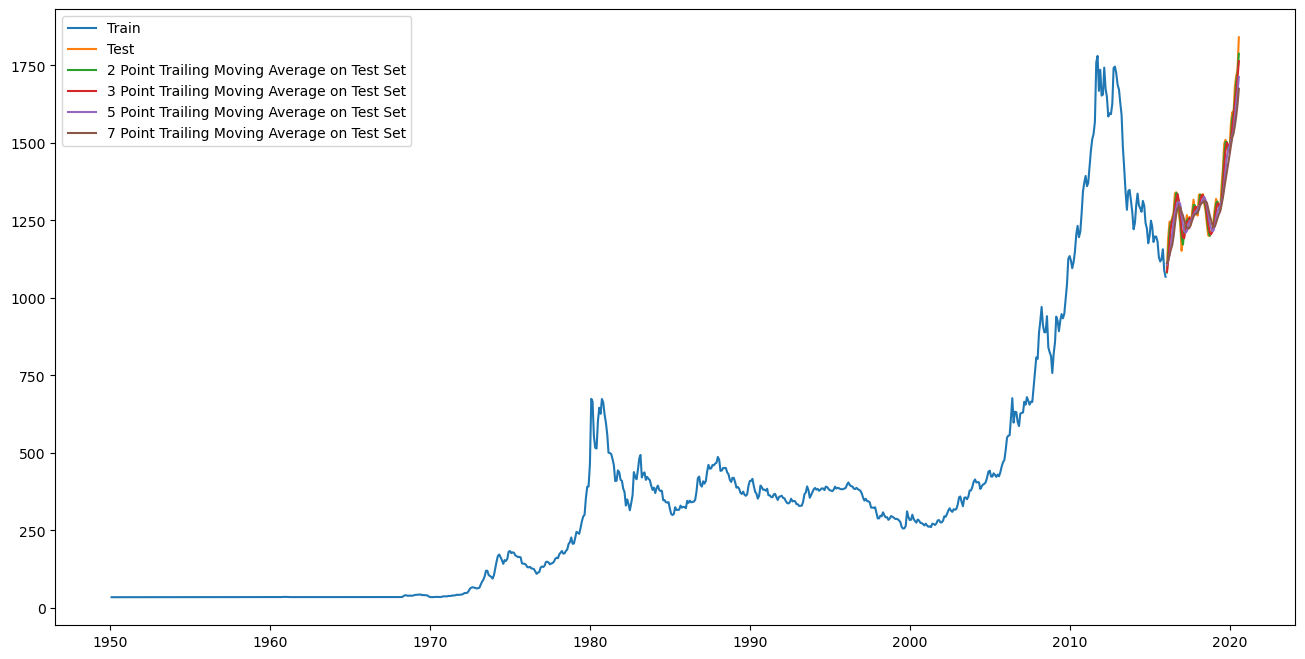

In [117]:
plt.figure(figsize=(16,8))
plt.plot(trailing_Mvg_Avg_train['Price'], label='Train')
plt.plot(trailing_Mvg_Avg_test['Price'], label='Test')

plt.plot(trailing_Mvg_Avg_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_Mvg_Avg_test['Trailing_3'], label='3 Point Trailing Moving Average on Test Set')
plt.plot(trailing_Mvg_Avg_test['Trailing_5'],label = '5 Point Trailing Moving Average on Test Set')
plt.plot(trailing_Mvg_Avg_test['Trailing_7'],label = '7 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')

In [118]:
## Test Data - MAPE --> 2 point Trailing MA

mape_model4_test_2 = mape(test['Price'].values,trailing_Mvg_Avg_test['Trailing_2'].values)
print("For 2 point Moving Average Model forecast on the Training Data,  MAPE is %3.3f" %(mape_model4_test_2),"%")

## Test Data - MAPE  --> 3 point Trailing MA

mape_model4_test_3 = mape(test['Price'].values,trailing_Mvg_Avg_test['Trailing_3'].values)
print("For 3 point Moving Average Model forecast on the Training Data,  MAPE is %3.3f" %(mape_model4_test_3),"%")

## Test Data - MAPE --> 5 point Trailing MA

mape_model4_test_5 = mape(test['Price'].values,trailing_Mvg_Avg_test['Trailing_5'].values)
print("For 5 point Moving Average Model forecast on the Training Data,  MAPE is %3.3f" %(mape_model4_test_5),"%")

## Test Data - MAPE  --> 7 point Trailing MA

mape_model4_test_7 = mape(test['Price'].values,trailing_Mvg_Avg_test['Trailing_7'].values)
print("For 7 point Moving Average Model forecast on the Training Data,  MAPE is %3.3f " %(mape_model4_test_7),"%")

For 2 point Moving Average Model forecast on the Training Data,  MAPE is 1.230 %
For 3 point Moving Average Model forecast on the Training Data,  MAPE is 2.050 %
For 5 point Moving Average Model forecast on the Training Data,  MAPE is 3.330 %
For 7 point Moving Average Model forecast on the Training Data,  MAPE is 4.180  %


In [119]:
resultsDf_4 = pd.DataFrame({'Test MAPE (%)': [mape_model4_test_2,mape_model4_test_3
                                          ,mape_model4_test_5,mape_model4_test_7]}
                           ,index=['2pointTrailingMovingAverage','3pointTrailingMovingAverage'
                                   ,'5pointTrailingMovingAverage','7pointTrailingMovingAverage'])

results = pd.concat([results, resultsDf_4])
results

,Test MAPE (%)
RegressionOnTime,29.76
NaiveModel,19.38
SimpleAverageModel,73.41
2pointTrailingMovingAverage,1.23
3pointTrailingMovingAverage,2.05
5pointTrailingMovingAverage,3.33
7pointTrailingMovingAverage,4.18


In [120]:
# As we are getting the Closed Predicted Values with Trailing 2,3,5,7
# & Also having low Mean Absolute Percentage Error

# Model 6:- Double Exponential Smoothing

In [133]:
DES_train= train.copy()
DES_test= test.copy()

In [134]:
model_DES= Holt(DES_train)

In [135]:
model_DES

In [138]:
results_list = []

for i in np.arange(0.3, 1.1, 0.1):
    for j in np.arange(0.3, 1.1, 0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_trend=j, optimized=False, use_brute=True)
        DES_train['predict', i, j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict', i, j] = model_DES_alpha_i_j.forecast(steps=55)

        mape_model6_train = mape(DES_train['Price'].values, DES_train['predict', i, j].values)
        mape_model6_test = mape(DES_test['Price'].values, DES_test['predict', i, j].values)

        results_list.append({'Alpha Values': i, 'Beta Values': j, 'Train MAPE': mape_model6_train,
                             'Test MAPE': mape_model6_test})

resultsDf_7 = pd.DataFrame(results_list)

In [146]:
resultsDf_7.sort_values(by=['Test MAPE']).head()

,Alpha Values,Beta Values,Train MAPE,Test MAPE
0,0.3,0.3,3.60,47.89
7,0.3,1.0,3.93,48.23
1,0.3,0.4,3.61,48.59
8,0.4,0.3,3.23,49.22
16,0.5,0.3,2.99,50.92


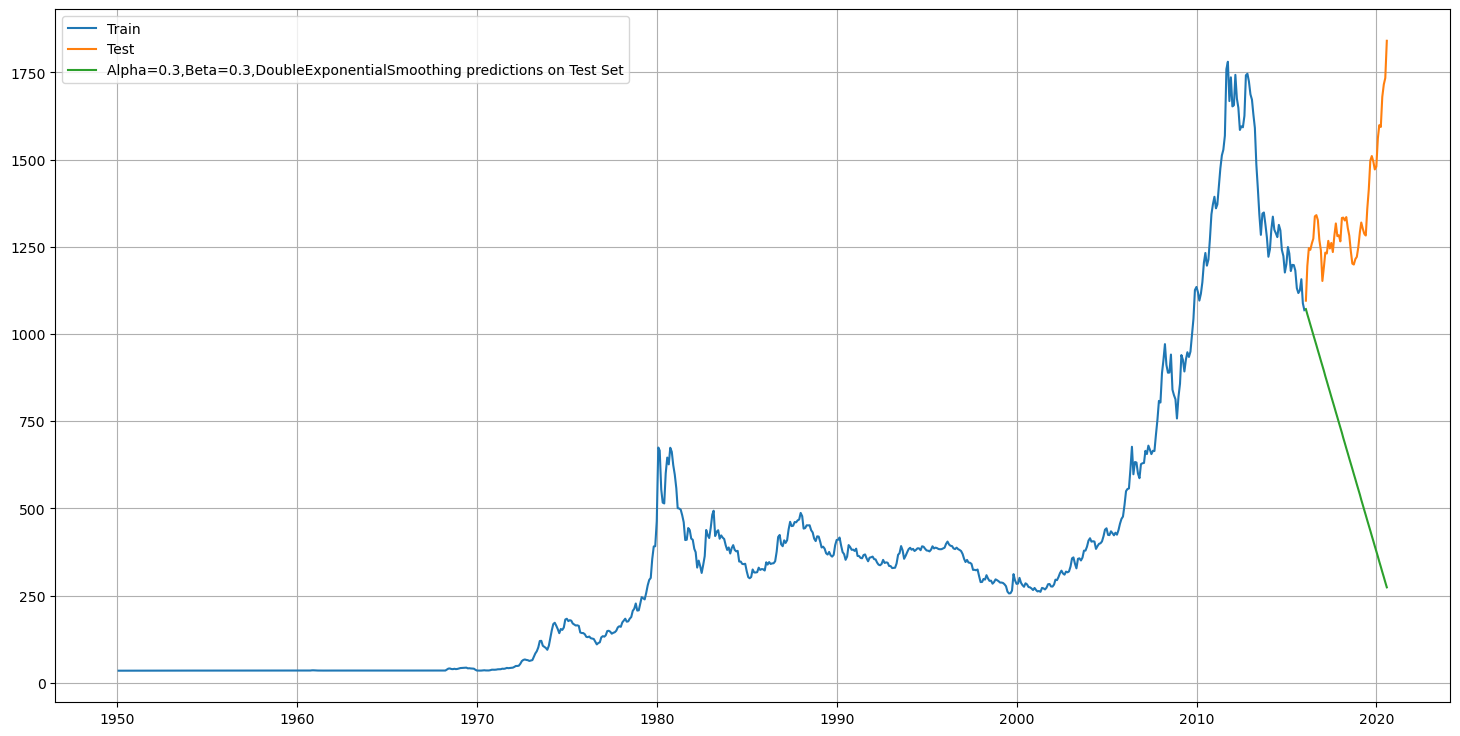

In [147]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Price'], label='Train')
plt.plot(DES_test['Price'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [148]:
resultsDf_7_1 = pd.DataFrame({'Test MAPE (%)': [resultsDf_7.sort_values(by=['Test MAPE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

results = pd.concat([results, resultsDf_7_1])
results

,Test MAPE (%)
RegressionOnTime,29.76
NaiveModel,19.38
SimpleAverageModel,73.41
2pointTrailingMovingAverage,1.23
3pointTrailingMovingAverage,2.05
5pointTrailingMovingAverage,3.33
7pointTrailingMovingAverage,4.18
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",47.89


# Model 7:- Triple Exponential Smoothing

In [150]:
TES_train = train.copy()
TES_test = test.copy()

In [151]:
model_TES = ExponentialSmoothing(TES_train['Price'],trend='additive',seasonal='additive',freq='M')
model_TES_autofit = model_TES.fit()

In [152]:
model_TES_autofit.params

{'smoothing_level': 0.9876747235575569,
 'smoothing_trend': 0.05289492822288415,
 'smoothing_seasonal': 0.00028732471736496495,
 'damping_trend': nan,
 'initial_level': 34.583347878659,
 'initial_trend': -0.0012659649640830838,
 'initial_seasons': array([ 3.98251503,  5.31363867,  0.5258024 , -1.40903108, -1.43258882,
        -3.48381281, -4.7798306 , -2.80110214,  1.76419561,  2.20684007,
         0.35697827, -0.3979241 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [153]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()


,Price,auto_predict
Month,,
2016-01-31,1095.655,1062.372090
2016-02-29,1194.893,1053.258335
2016-03-31,1246.312,1038.026314
2016-04-30,1241.452,1025.632543
2016-05-31,1259.755,1015.165800


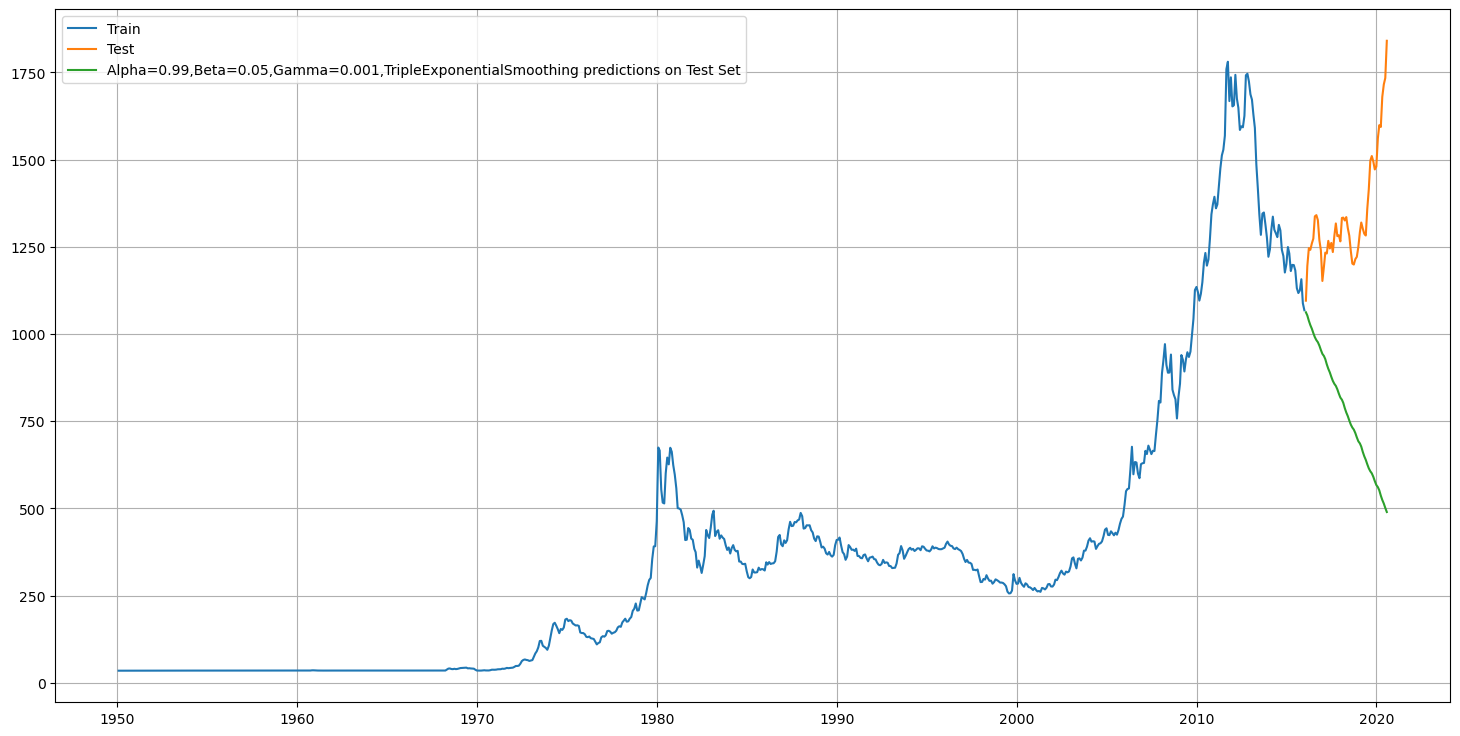

In [154]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Price'], label='Train')
plt.plot(TES_test['Price'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.99,Beta=0.05,Gamma=0.001,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [155]:
## Test Data

mape_model6_test_1 = mape(TES_test['Price'].values,TES_test['auto_predict'].values)
print("For A=0.99,B=0.05,G=0.001, Triple ES Model forecast on the Test Data,  MAPE is %3.3f" %(mape_model6_test_1),"%")

For A=0.99,B=0.05,G=0.001, Triple ES Model forecast on the Test Data,  MAPE is 40.450 %


In [156]:
resultsDf_8_1 = pd.DataFrame({'Test MAPE (%)': [mape_model6_test_1]}
                           ,index=['Alpha=0.99,Beta=0.05,Gamma=0.001,TripleExponentialSmoothing'])

results = pd.concat([results, resultsDf_8_1])
results

,Test MAPE (%)
RegressionOnTime,29.76
NaiveModel,19.38
SimpleAverageModel,73.41
2pointTrailingMovingAverage,1.23
3pointTrailingMovingAverage,2.05
5pointTrailingMovingAverage,3.33
7pointTrailingMovingAverage,4.18
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",47.89
"Alpha=0.99,Beta=0.05,Gamma=0.001,TripleExponentialSmoothing",40.45


In [157]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train MAPE':[],'Test MAPE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train MAPE,Test MAPE


In [160]:
resultsDf_8_2 = pd.DataFrame(columns=['Alpha Values', 'Beta Values', 'Gamma Values', 'Train MAPE', 'Test MAPE'])

for i in np.arange(0.3, 1.1, 0.1):
    for j in np.arange(0.3, 1.1, 0.1):
        for k in np.arange(0.3, 1.1, 0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i, smoothing_trend=j, smoothing_seasonal=k,
                                                   optimized=False, use_brute=True)
            TES_train['predict', i, j, k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict', i, j, k] = model_TES_alpha_i_j_k.forecast(steps=55)

            mape_model8_train = mape(TES_train['Price'].values, TES_train['predict', i, j, k].values)
            mape_model8_test = mape(TES_test['Price'].values, TES_test['predict', i, j, k].values)

            resultsDf_8_2 = pd.concat([resultsDf_8_2, pd.DataFrame({'Alpha Values': [i],
                                                                   'Beta Values': [j],
                                                                   'Gamma Values': [k],
                                                                   'Train MAPE': [mape_model8_train],
                                                                   'Test MAPE': [mape_model8_test]})],
                                     ignore_index=True)


In [161]:
resultsDf_8_2.sort_values(by=['Test MAPE']).head()

,Alpha Values,Beta Values,Gamma Values,Train MAPE,Test MAPE
67,0.4,0.3,0.6,11.53,5.99
320,0.8,0.3,0.3,3.81,6.94
24,0.3,0.6,0.3,11.68,9.56
130,0.5,0.3,0.5,8.93,13.07
73,0.4,0.4,0.4,8.75,14.99


In [162]:
model_TES_alpha_best = model_TES.fit(smoothing_level=0.4,
                                      smoothing_trend=0.3,
                                      smoothing_seasonal=0.6,
                                      optimized=False,
                                      use_brute=True)
TES_train['predict',0.4,0.3,0.6] = model_TES_alpha_best.fittedvalues
TES_test['predict',0.4,0.3,0.6] = model_TES_alpha_best.forecast(steps=55)

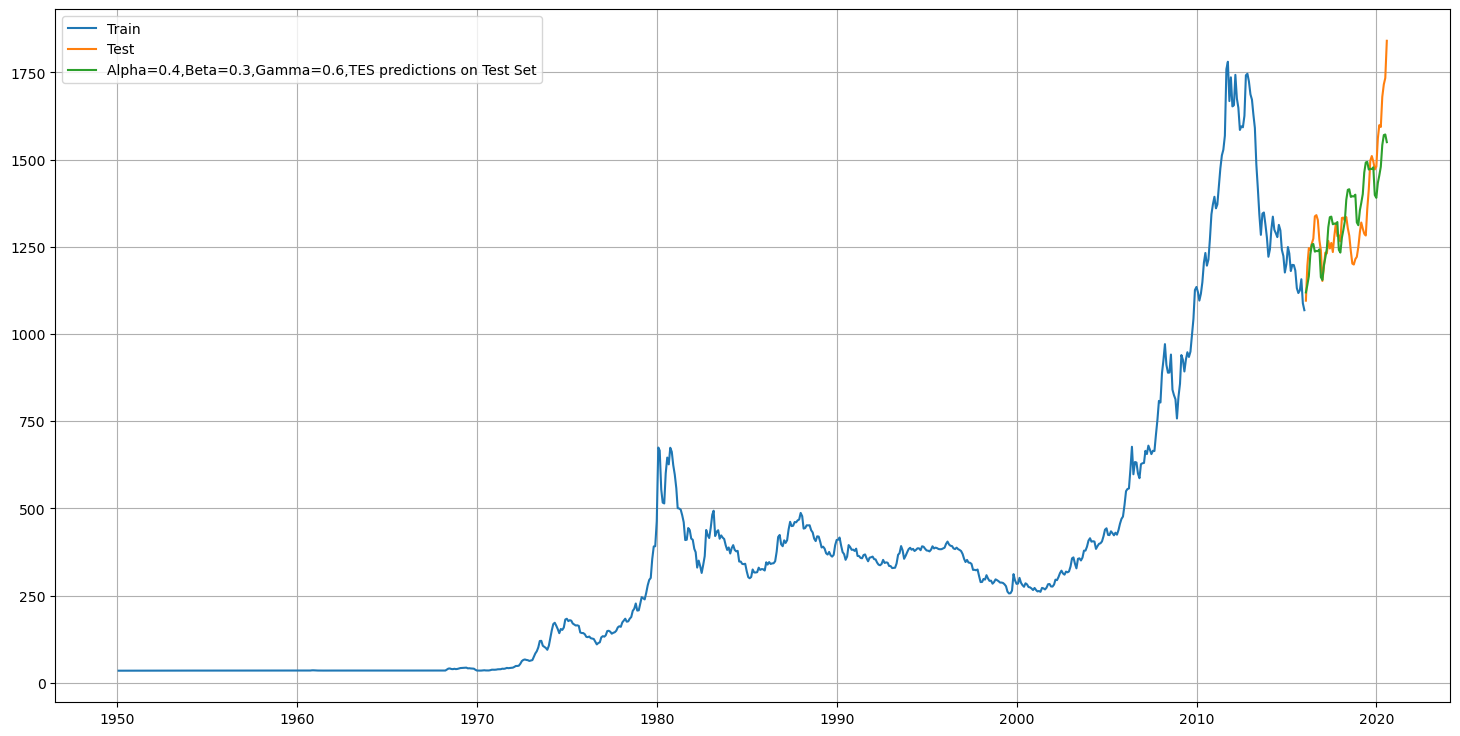

In [163]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Price'], label='Train')
plt.plot(TES_test['Price'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.4, 0.3, 0.6], label='Alpha=0.4,Beta=0.3,Gamma=0.6,TES predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [164]:
## Test Data

mape_model7_test = mape(TES_test['Price'].values,TES_test['predict',0.4,0.3,0.6].values)
print("For A=0.4,B=0.3,G=0.6, Triple ES Model forecast on the Test Data,  MAPE is %3.3f" %(mape_model7_test),"%")

For A=0.4,B=0.3,G=0.6, Triple ES Model forecast on the Test Data,  MAPE is 5.990 %


In [165]:
resultsDf_9_1 = pd.DataFrame({'Test MAPE (%)': [mape_model7_test]}
                           ,index=['Alpha=0.4,Beta=0.3,Gamma=0.6,TripleExponentialSmoothing'])

results = pd.concat([results, resultsDf_9_1])
results

,Test MAPE (%)
RegressionOnTime,29.76
NaiveModel,19.38
SimpleAverageModel,73.41
2pointTrailingMovingAverage,1.23
3pointTrailingMovingAverage,2.05
5pointTrailingMovingAverage,3.33
7pointTrailingMovingAverage,4.18
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",47.89
"Alpha=0.99,Beta=0.05,Gamma=0.001,TripleExponentialSmoothing",40.45
"Alpha=0.4,Beta=0.3,Gamma=0.6,TripleExponentialSmoothing",5.99


# Final Model

In [166]:
final_model =  ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='additive').fit(smoothing_level=0.4,
                                                           smoothing_trend=0.3,
                                                           smoothing_seasonal=0.6)

In [167]:
MAPE_final_model = mape(df['Price'].values,final_model.fittedvalues)

print('MAPE:',MAPE_final_model)

MAPE: 17.24


In [168]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction = final_model.forecast(steps=len(test))

In [169]:
# Compute 95% confidence interval for predicted values
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(final_model.resid,ddof=1),
                        'prediction':prediction,
                        'upper_CI': prediction + 1.96*np.std(final_model.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.713703,1792.864676,1901.015650
2020-09-30,1615.291065,1723.442039,1831.593012
2020-10-31,1538.543199,1646.694172,1754.845146
2020-11-30,1476.724385,1584.875359,1693.026332
2020-12-31,1459.285045,1567.436019,1675.586992


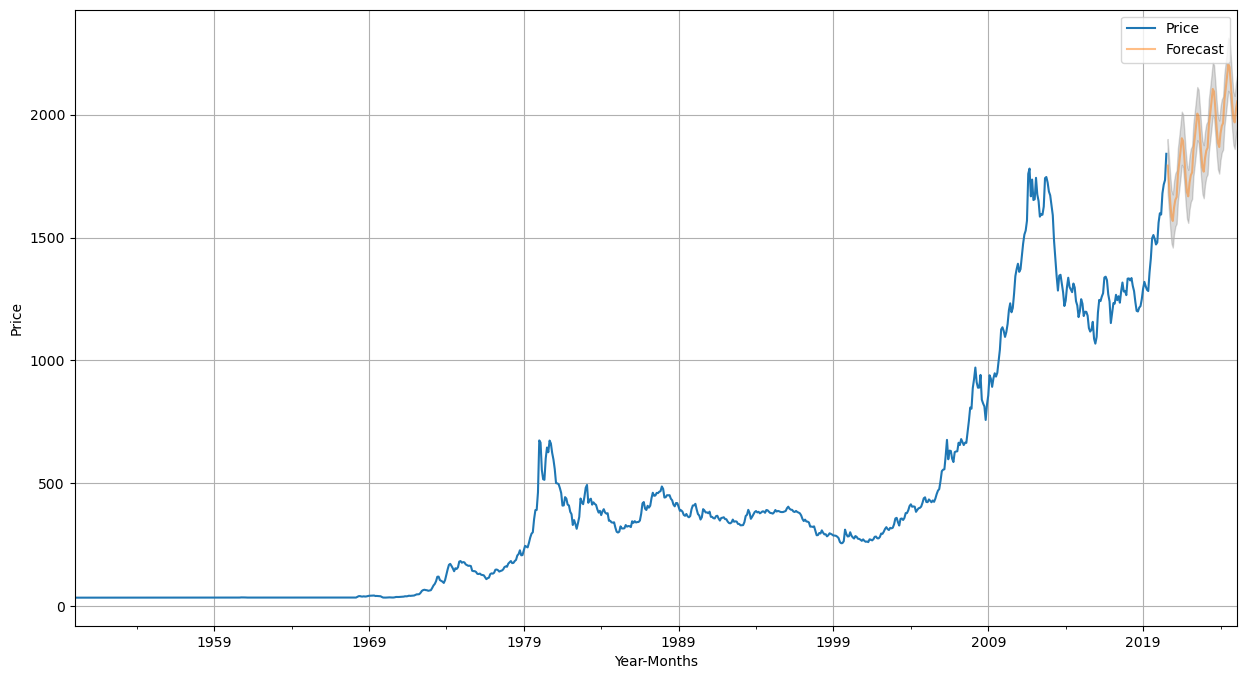

In [170]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Price')
plt.legend(loc='best')
plt.grid()
plt.show()